In [1]:
import torch
import yaml
import matplotlib.pyplot as plt
from pathlib import Path
from utils import multi_label_train_loop
from pathlib import Path
import sys

root = Path.cwd()
while root != root.parent and not (root / "src").exists():
    root = root.parent
if str(root) not in sys.path:
    sys.path.insert(0, str(root))

print("Repo root:", root)


Repo root: /Users/hughsignoriello/Developer/ml-based-analysis-of-sound


In [2]:
TRAIN_RUN = "CNN_v1"
WEIGHTS_DIR = Path(f"../models/saved_weights/{TRAIN_RUN}")

# MANIFEST_CSV = "../../data/processed/train_mels.csv",
    
MANIFEST_CSV = [
    "../../data/processed/train_mels.csv",
    "../../data/processed/train_mels_mixed.csv",
]
LABELS_YAML = "../configs/labels.yaml"
AUDIO_CONFIG_YAML = "../configs/audio_params.yaml" 

CONFIG = {
    "batch_size": 32,
    "lr": 1e-3,
    "epochs": 120,
    "patience": 30,
    "weight_decay": 1e-4,
    "dropout": 0.5,
    "val_frac": 0.2,
    "seed": 1337,
    "threshold": 0.5
}

In [ ]:
with open(AUDIO_CONFIG_YAML, 'r') as f:
    audio_params = yaml.safe_load(f)
with open(LABELS_YAML, 'r') as f:
    label_config = yaml.safe_load(f)
    classes = [c.strip().lower() for c in label_config.get('train_labels', [])]
print(f"Loaded {len(classes)} classes: {', '.join(classes)}")


resume_ckpt = WEIGHTS_DIR / "last.pt" 
if not resume_ckpt.exists():
    resume_ckpt = None
    print("Starting fresh. No previous weights found.")
else:
    print(f"Existing weights detected. Resuming from {resume_ckpt}")

results = multi_label_train_loop(
    manifest_csv=MANIFEST_CSV,
    classes=classes,
    ckpt_dir=WEIGHTS_DIR,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    lr=CONFIG["lr"],
    weight_decay=CONFIG["weight_decay"],
    val_frac=CONFIG["val_frac"],
    dropout=CONFIG["dropout"],
    patience=CONFIG["patience"],
    num_workers=2,
    threshold=CONFIG["threshold"],
    seed=CONFIG["seed"],
    audio_cfg=audio_params['audio'],
    resume_from=resume_ckpt,
    save_best_stamped=False,
)
    
# Run the training
history = results["history"]

Loaded 15 classes: strings, brass, percussion, woodwind, sheng, dizi, timpani, erhu, pipa, suona, guzheng, piano, guqin, xiao, yangqin
Existing weights detected. Resuming from ../models/saved_weights/CNN_v1/last.pt


/Users/hughsignoriello/Developer/ml-based-analysis-of-sound/src/train/utils.py:36: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=False)


[31/120] Loss: 0.1276/0.1064 | Val MicroF1: 0.7252 | Time: 50.3s
[32/120] Loss: 0.1019/0.0995 | Val MicroF1: 0.7367 | Time: 48.8s
[33/120] Loss: 0.1002/0.0921 | Val MicroF1: 0.7755 | Time: 69.3s
[34/120] Loss: 0.0987/0.0963 | Val MicroF1: 0.7545 | Time: 68.3s
[35/120] Loss: 0.0989/0.0923 | Val MicroF1: 0.7673 | Time: 68.7s
[36/120] Loss: 0.0975/0.0900 | Val MicroF1: 0.7816 | Time: 72.8s
[37/120] Loss: 0.0964/0.0961 | Val MicroF1: 0.7458 | Time: 67.5s
[38/120] Loss: 0.0957/0.0847 | Val MicroF1: 0.7971 | Time: 70.7s
[39/120] Loss: 0.0949/0.0865 | Val MicroF1: 0.7916 | Time: 70.1s
[40/120] Loss: 0.0935/0.0873 | Val MicroF1: 0.7830 | Time: 58.7s
[41/120] Loss: 0.0934/0.0880 | Val MicroF1: 0.7848 | Time: 67.1s
[42/120] Loss: 0.0904/0.0861 | Val MicroF1: 0.7846 | Time: 60.3s
[43/120] Loss: 0.0919/0.0833 | Val MicroF1: 0.7941 | Time: 68.9s
[44/120] Loss: 0.0905/0.0849 | Val MicroF1: 0.7777 | Time: 74.6s
[45/120] Loss: 0.0903/0.0862 | Val MicroF1: 0.7845 | Time: 70.6s
[46/120] Loss: 0.0887/0.0

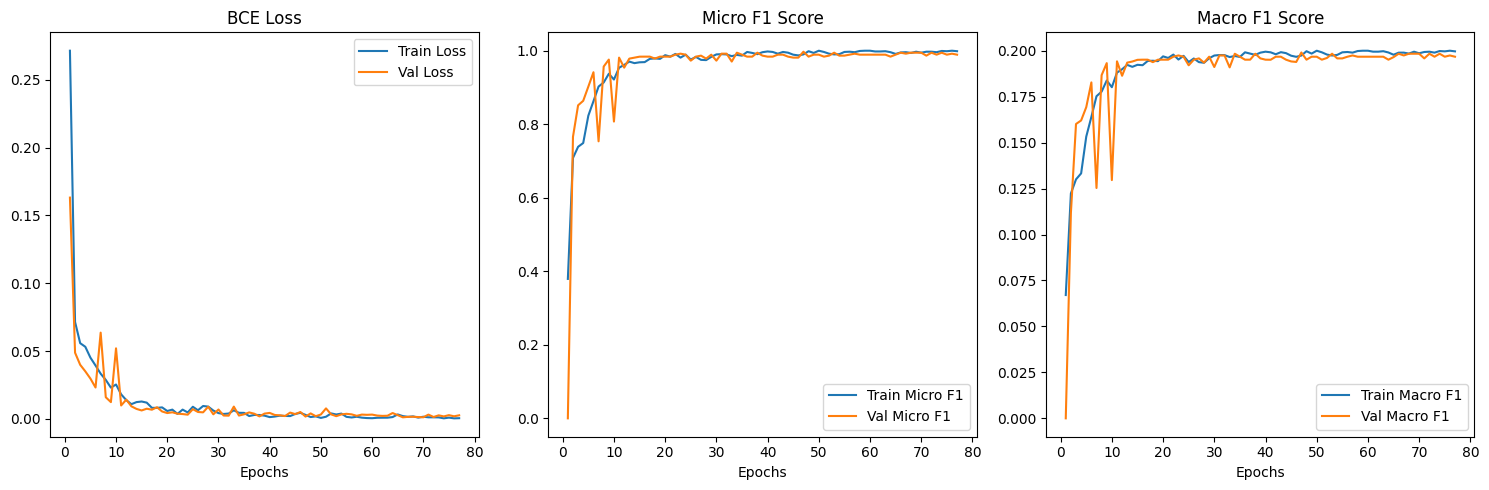

Audio Config used during training:
{'sr': 44100, 'duration': 3.0, 'n_mels': 128, 'win_ms': 30.0, 'hop_ms': 10.0, 'fmin': 20.0, 'fmax': 20000.0}


In [ ]:
from utils import plot_metrics

WEIGHTS_DIR = Path(f"../models/saved_weights/{TRAIN_RUN}")
MODEL_WEIGHTS = Path(WEIGHTS_DIR / "last.pt")
ckpt_loaded = torch.load(MODEL_WEIGHTS, map_location="cpu")
audio_params = ckpt_loaded['audio_config']
history = ckpt_loaded["history"]
plot_metrics(history)

print("Audio Config used during training:")
print(audio_params)